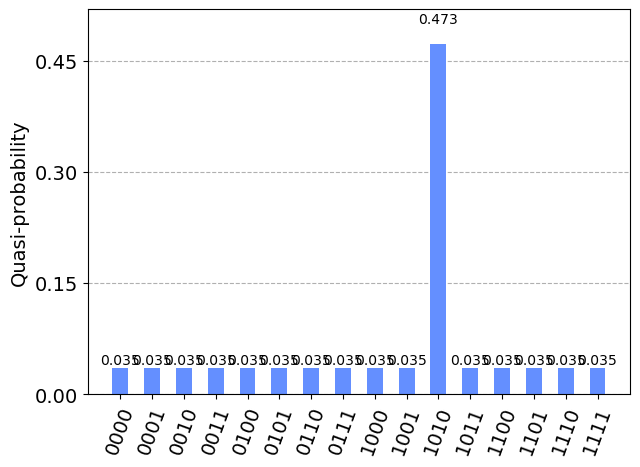

In [4]:
import matplotlib.pyplot as plt
from math import asin, sqrt
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, qasm
from qiskit.circuit.library import ZGate
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.tools.visualization import circuit_drawer
%matplotlib inline

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

# --- Superposition über alle Zustände
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

# --- Quantenoracle anwenden
qc.x(0)
qc.x(2)
qc.append(ZGate().control(3), [*qr])
qc.x(0)
qc.x(2) 

# --- Diffuser für Amplitudenverstärkung
qc.h(qr)
qc.x(qr)
qc.append(ZGate().control(3), [*qr])
qc.x(qr)
qc.h(qr)


backend = Aer.get_backend("statevector_simulator")
results = execute(qc, backend).result().get_counts(qc)
plot_histogram(results)